In [1]:
# !unzip "/content/drive/MyDrive/Cao Học/Phương pháp NCKH - Cao Văn Kiên/Cuối Kỳ/Model/tieuDuong.zip" -d "/content/drive/MyDrive/Cao Học/Phương pháp NCKH - Cao Văn Kiên/Cuối Kỳ/Model/data"

In [17]:
import matplotlib

print("Matplotlib version:", matplotlib.__version__)


Matplotlib version: 3.7.1


In [2]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/Cao Học/Phương pháp NCKH - Cao Văn Kiên/Cuối Kỳ/Model/data/diabetes.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Các thuộc tính cần kiểm tra giá trị ngoại lai
attributes = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Kiểm tra giá trị ngoại lai cho từng thuộc tính
for attribute in attributes:
    # Tính Q1 và Q3
    Q1 = data[attribute].quantile(0.25)
    Q3 = data[attribute].quantile(0.75)
    IQR = Q3 - Q1
    
    # Xác định giá trị ngoại lai dựa trên IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # In ra giá trị ngoại lai
    outliers = data[(data[attribute] < lower_bound) | (data[attribute] > upper_bound)]
    print(f"Giá trị ngoại lai của '{attribute}':")
    print(outliers)
    print("\n")

Giá trị ngoại lai của 'Pregnancies':
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
88            15      136             70             32      110  37.1   
159           17      163             72             41      114  40.9   
298           14      100             78             25      184  36.6   
455           14      175             62             30        0  33.6   

     DiabetesPedigreeFunction  Age  Outcome  
88                      0.153   43        1  
159                     0.817   47        1  
298                     0.412   46        1  
455                     0.212   38        1  


Giá trị ngoại lai của 'Glucose':
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
75             1        0             48             20        0  24.7   
182            1        0             74             20       23  27.7   
342            1        0             68             35        0  32.0   
349            5        0      

In [5]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [14]:
# Đếm số lượng giá trị 1 và 0 trong thuộc tính phân lớp 'Outcome'
class_counts = data['Outcome'].value_counts()

# In kết quả
print("Số lượng giá trị 1:", class_counts[1])
print("Số lượng giá trị 0:", class_counts[0])

# Tính tỷ lệ phần trăm các giá trị trong thuộc tính phân lớp 'Outcome'
class_percentages = data['Outcome'].value_counts(normalize=True) * 100

# In kết quả
print("Tỷ lệ giá trị 1:", class_percentages[1])
print("Tỷ lệ giá trị 0:", class_percentages[0])

Số lượng giá trị 1: 268
Số lượng giá trị 0: 500
Tỷ lệ giá trị 1: 34.89583333333333
Tỷ lệ giá trị 0: 65.10416666666666


<Axes: >

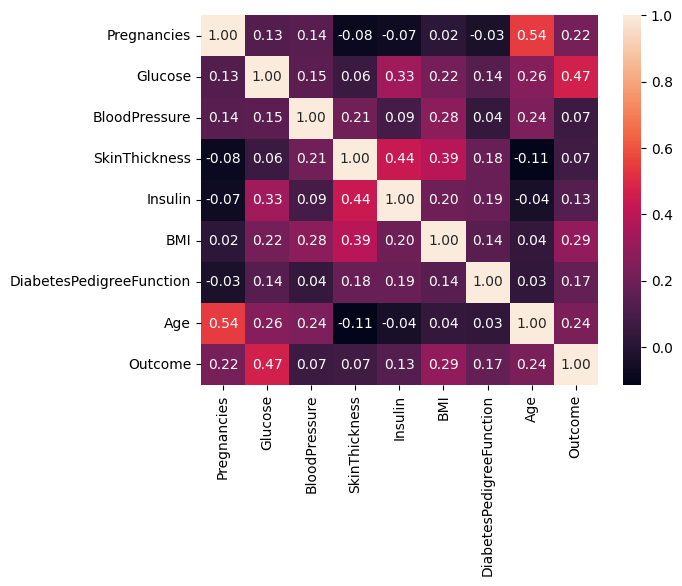

In [7]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True,fmt='0.2f')

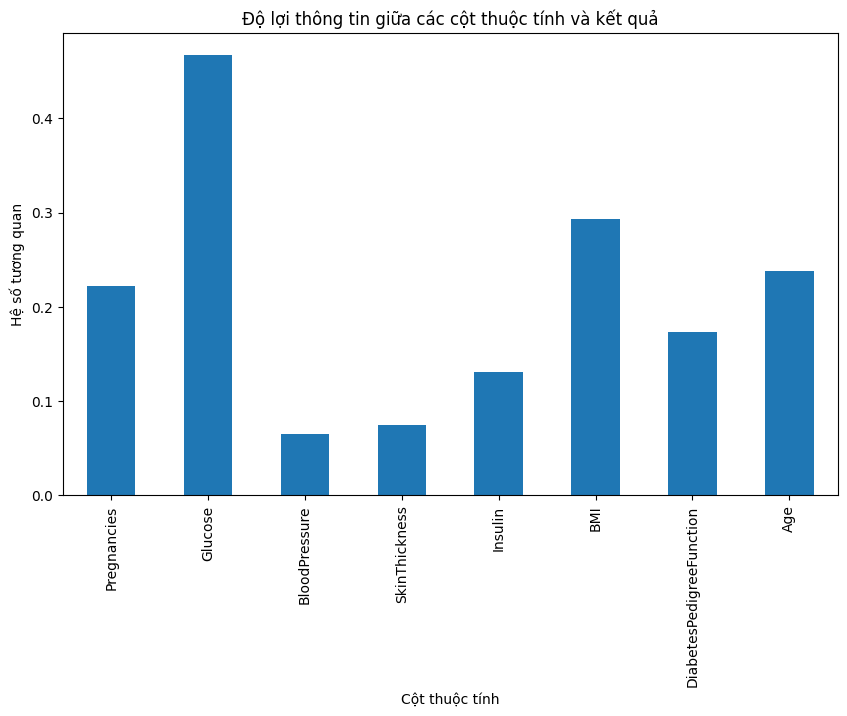

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tệp CSV
data = pd.read_csv('/content/drive/MyDrive/Cao Học/Phương pháp NCKH - Cao Văn Kiên/Cuối Kỳ/Model/data/diabetes.csv')

# Tính ma trận tương quan
corr_matrix = data.corr()

# Lấy hệ số tương quan của cột 'Outcome' với các cột khác
outcome_corr = corr_matrix['Outcome']

# Xóa hệ số tương quan của cột 'Outcome' với chính nó
outcome_corr = outcome_corr.drop('Outcome')

# Trực quan hóa hệ số tương quan
outcome_corr.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Cột thuộc tính')
plt.ylabel('Hệ số tương quan')
plt.title('Độ lợi thông tin giữa các cột thuộc tính và kết quả')
plt.show()

In [9]:
# # Xác định các giá trị ngoại lai bằng cách sử dụng phạm vi hoặc phương sai
# outlier_threshold = 2.5  # Định nghĩa ngưỡng ngoại lai (có thể điều chỉnh)

# # Loại bỏ các giá trị ngoại lai
# data = data[(data['BMI'] < data['BMI'].mean() + outlier_threshold * data['BMI'].std()) &
#             (data['BloodPressure'] < data['BloodPressure'].mean() + outlier_threshold * data['BloodPressure'].std()) &
#             (data['Glucose'] < data['Glucose'].mean() + outlier_threshold * data['Glucose'].std()) &
#             (data['Insulin'] < data['Insulin'].mean() + outlier_threshold * data['Insulin'].std()) &
#             (data['SkinThickness'] < data['SkinThickness'].mean() + outlier_threshold * data['SkinThickness'].std()) &
#             (data['Age'] < data['Age'].mean() + outlier_threshold * data['Age'].std())]

### **Mô hình Gausian Naive Bayes**

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, mean_absolute_error, r2_score

# Chọn các đặc trưng và nhãn
features = data.drop('Outcome', axis=1)
labels = data['Outcome']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Xây dựng mô hình Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Dự đoán nhãn trên tập huấn luyện
y_train_pred = model.predict(X_train)

# Dự đoán nhãn trên tập kiểm tra
y_pred = model.predict(X_test)


# Đánh giá mô hình
# train
accuracy_train = accuracy_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_test, y_pred)
rmse_train = mean_squared_error(y_test, y_pred, squared=False)
r2_train = r2_score(y_test, y_pred)

print("Đánh giá mô hình Naive Bayes trên tập train:")

print("Accuracy mô hình NB train:", accuracy_train)

# test
accuracy_test = accuracy_score(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = mean_squared_error(y_test, y_pred, squared=False)
r2_test = r2_score(y_test, y_pred)

print("\nĐánh giá mô hình Naive Bayes trên tập test:")
print(classification_report(y_test, y_pred))
print("\nAccuracy mô hình NB test:", accuracy_test)
print("\nMean Squared Error (MSE) mô hình NB:", mse_test)
print("Root Mean Squared Error (RMSE) mô hình NB:", rmse_test)
print("R2 Score mô hình NB:", r2_test)

Đánh giá mô hình Naive Bayes trên tập train:
Accuracy mô hình NB train: 0.752442996742671

Đánh giá mô hình Naive Bayes trên tập test:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154


Accuracy mô hình NB test: 0.7662337662337663

Mean Squared Error (MSE) mô hình NB: 0.23376623376623376
Root Mean Squared Error (RMSE) mô hình NB: 0.48349377841522817
R2 Score mô hình NB: -0.01818181818181852


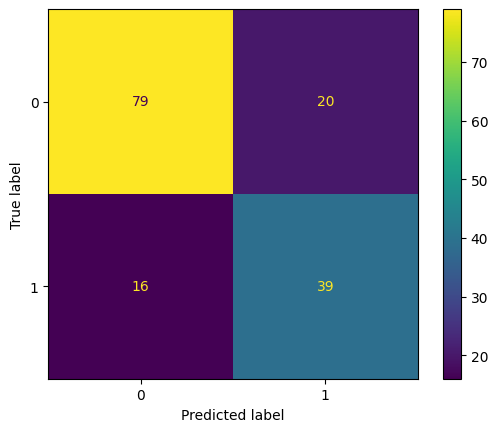

In [11]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [12]:
import numpy as np

patient_info = np.array([[6,148,72,35,0,33.6,0.627,50]])
prediction = model.predict(patient_info)
if prediction == 0:
    print("No")
elif prediction == 1:
    print("Yes")
else:
    print("Error")

Yes
